In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("kidney_disease.csv")
df.head(20)

Saving kidney_disease.csv to kidney_disease (3).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000.0,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300.0,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,7800.0,4.4,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# Mapping the text to 1/0 and cleaning the dataset 
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [ ]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wc       float64
rc       float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

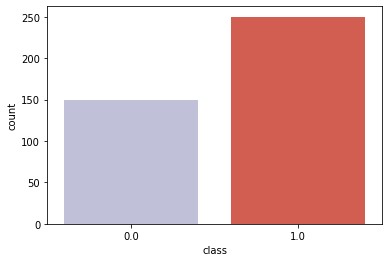

In [ ]:
ax = sns.countplot(x="class",data=df, palette=["#bcbddc", "#e74c3c"])   

In [ ]:
df.isnull().sum().sort_values(ascending=False)

rbc      152
pot       88
sod       87
pc        65
hemo      51
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
wc         3
htn        2
dm         2
cad        2
ane        1
appet      1
pe         1
pcv        0
rc         0
class      0
dtype: int64

In [ ]:
mis_val_percent=((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
mis_val_percent

rbc      38.00
pot      22.00
sod      21.75
pc       16.25
hemo     12.75
su       12.25
sg       11.75
al       11.50
bgr      11.00
bu        4.75
sc        4.25
bp        3.00
age       2.25
ba        1.00
pcc       1.00
wc        0.75
htn       0.50
dm        0.50
cad       0.50
ane       0.25
appet     0.25
pe        0.25
pcv       0.00
rc        0.00
class     0.00
dtype: float64

In [ ]:
df['class'].value_counts()

1.0    250
0.0    150
Name: class, dtype: int64

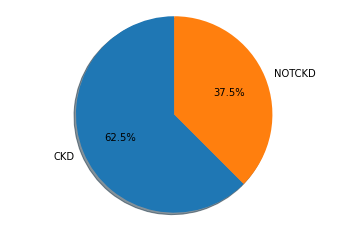

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["class"].value_counts(),  labels=['CKD','NOTCKD'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
!pip install -U scikit-learn
import sklearn
sklearn.__version__

'0.24.2'

In [ ]:
df = df.dropna()
print(df.shape)

(173, 25)


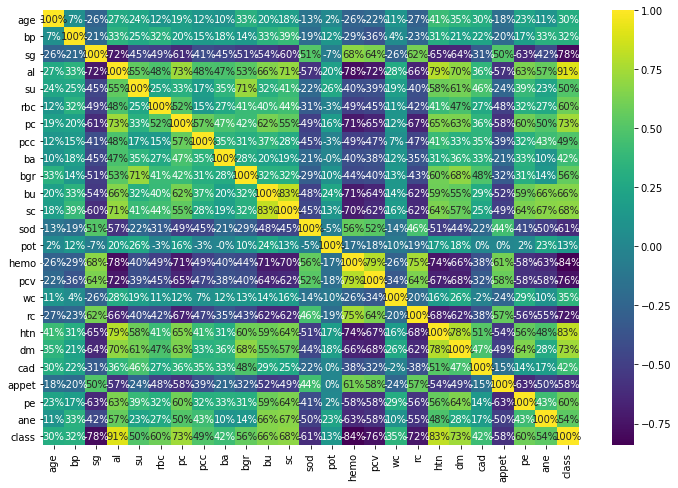

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,0:25].corr(), cmap='viridis', annot=True, fmt ='.0%', linecolor='Blue')

In [ ]:
df.isna().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     173 non-null    float64
 1   bp      173 non-null    float64
 2   sg      173 non-null    float64
 3   al      173 non-null    float64
 4   su      173 non-null    float64
 5   rbc     173 non-null    float64
 6   pc      173 non-null    float64
 7   pcc     173 non-null    float64
 8   ba      173 non-null    float64
 9   bgr     173 non-null    float64
 10  bu      173 non-null    float64
 11  sc      173 non-null    float64
 12  sod     173 non-null    float64
 13  pot     173 non-null    float64
 14  hemo    173 non-null    float64
 15  pcv     173 non-null    int64  
 16  wc      173 non-null    float64
 17  rc      173 non-null    float64
 18  htn     173 non-null    float64
 19  dm      173 non-null    float64
 20  cad     173 non-null    float64
 21  appet   173 non-null    float64
 22  pe

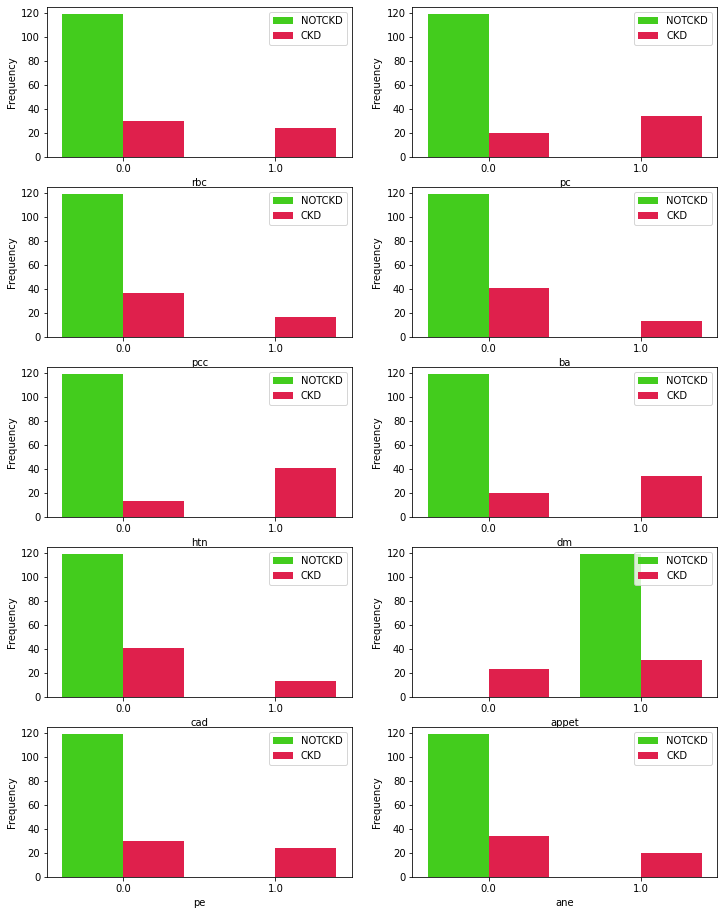

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fs = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='class', data=df, palette='prism', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["NOTCKD", "CKD"])

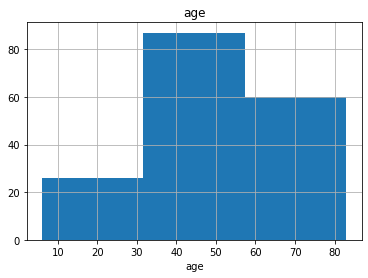

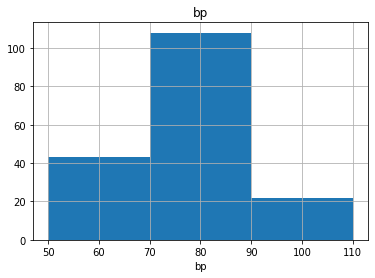

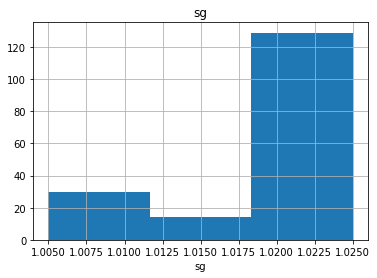

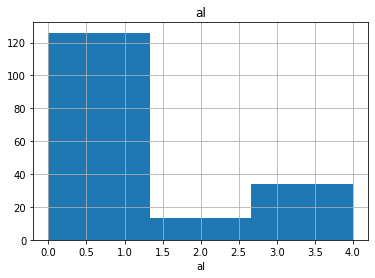

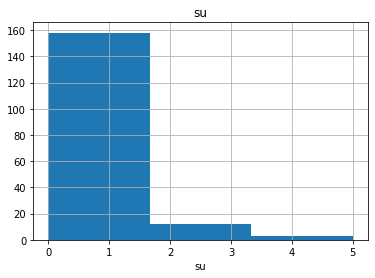

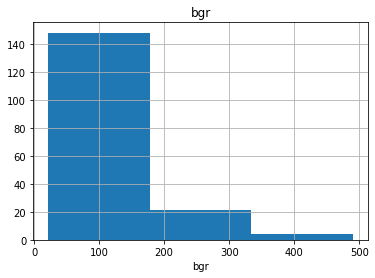

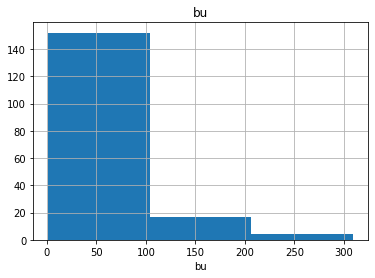

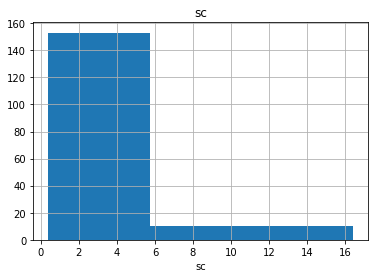

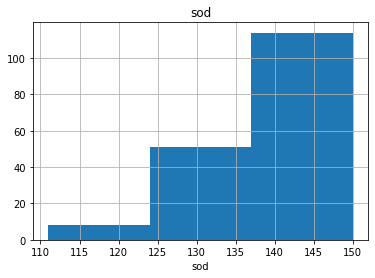

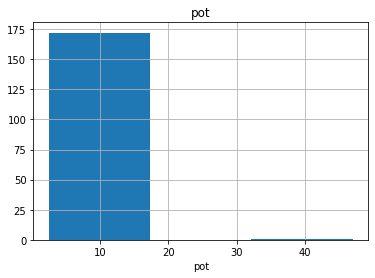

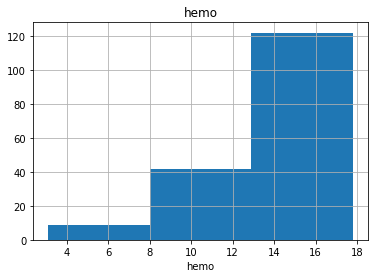

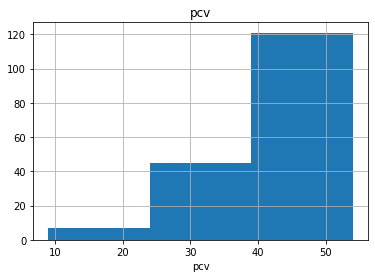

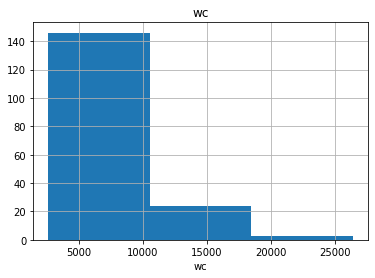

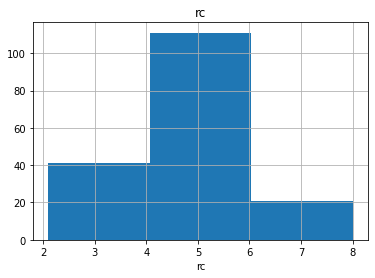

14 variables have been plotted


In [ ]:
numeric_cols1= ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

def hist_for_nums(data, numeric_cols1):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols1:
        data[col].hist(bins=3)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df, numeric_cols1)

In [ ]:
X = df.iloc[:,0:23].values
Y = df.iloc[:,24].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.30,random_state = 40, shuffle = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time

In [ ]:
def models(X_train, Y_train):
 
  #Decision tree              0
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 48)
  tree.fit(X_train, Y_train)


  #Random forest              1
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 48)
  forest.fit(X_train, Y_train)

   # K-Nearest Neighbors     2
  classifier = KNeighborsClassifier(n_neighbors = 12)
  classifier.fit(X_train, Y_train)
  
  print('[0] Decision Tree Training Accuracy: ',tree.score(X_train, Y_train))
  print('[1] Random Forest Training Accuracy: ',forest.score(X_train, Y_train))
  print('[2] KNN Traning Accuracy: ',classifier.score(X_train, Y_train))

  return tree, forest, classifier

In [ ]:
model = models(X_train, Y_train)

[0] Decision Tree Training Accuracy:  1.0
[1] Random Forest Training Accuracy:  1.0
[2] KNN Traning Accuracy:  0.9338842975206612


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics

for i in range(len(model)):
  print('Confusion matrix of model',i , 'is :')
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TP = cm[0][0]
  TN = cm[1][1]
  FP = cm[0][1]
  FN = cm[1][0]
  print(cm)
  print()
  result1 = classification_report(Y_test, model[i].predict(X_test))
  print("Classification Report : ",)
  print (result1)
  print()
  var = ((TP + TN)/(TP + TN + FP + FN)) *100
  print('Testing accuracy : ',var)
  print('Sensitivity : ', TP/(TP+FN))
  print('Specificity : ', TN/(TN+FP))
  print('false positive rate : ', FP/(FP+TN))
  print('false negative rate : ', FN/(FN+TP))
  print('Negative Predictive Value : ', TN/(TN+FN))
  print('False Discovery rate : ', FP/(TP+FP))
  print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, model[i].predict(X_test)))
  print('Mean Squared Error:', metrics.mean_squared_error(Y_test, model[i].predict(X_test)))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, model[i].predict(X_test))))
  print()
  print()

Confusion matrix of model 0 is :
[[37  0]
 [ 1 14]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        37
         1.0       1.00      0.93      0.97        15

    accuracy                           0.98        52
   macro avg       0.99      0.97      0.98        52
weighted avg       0.98      0.98      0.98        52


Testing accuracy :  98.07692307692307
Sensitivity :  0.9736842105263158
Specificity :  1.0
false positive rate :  0.0
false negative rate :  0.02631578947368421
Negative Predictive Value :  0.9333333333333333
False Discovery rate :  0.0
Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073


Confusion matrix of model 1 is :
[[37  0]
 [ 0 15]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       1.00      1.00      1.